In [1]:
from scipy.stats import norm
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
delta = 0.25
dt = 0.1

# initial condition
x = 0.0

# number of initerations
N = 20

# iterate to compute the steps of Brownian motion
for _ in range (N):
  x += np.random.normal(scale = delta **2*dt) # generate random variable
  print(x)

-0.002527609364881831
0.014016763264495415
0.014018059905597745
0.018525139015972886
0.02262456895801392
0.02052455867261946
0.01681632130287352
0.013550682250168474
0.017172891340371935
0.013703665679300942
0.015491793233240741
0.01883395343863869
0.010442318110489766
0.010205256901404766
0.0023686595762583227
-0.0014112002866827743
-0.0013462212915686044
-0.005632675170322492
-0.003887883728414669
-0.0030742387606773535


In [3]:
def brownian(x0, n, dt, delta, out=None):
  x0 = np.asarray(x0)

  # For each element of x0, generate a sample of n numbers from a normal distribution
  r = norm.rvs(size = x0.shape + (n,), scale = delta*sqrt(dt))

  # If 'out' was not given, create an output array
  if out is None:
    out = np.empty(r.shape)
  
  # This computes the Brownian motion by forming the cumulative sum of the random samples
  np.cumsum(r, axis = -1, out = out)

  # Add the initial condition
  out += np.expand_dims(x0, axis =-1)

  return out

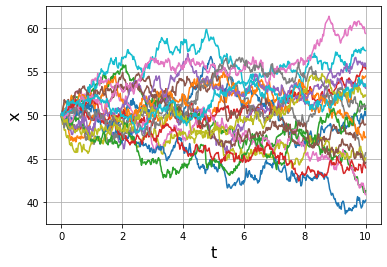

In [8]:
# Wiener process parameter
delta = 2.0
# Total time
T = 10.0
# Number of steps
N = 500
# Time step size
dt = T/N 
# Number of realizations to generate
m = 20
# Create an empty array to store the realization
x = np.empty((m,N+1))
# Initial vlaues of X
x[:, 0] = 50

brownian(x[:,0], N, dt, delta, out = x[:, 1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range (m):
  plt.plot(t, x[k])
plt.xlabel('t', fontsize = 16)
plt.ylabel('x', fontsize = 16)
plt.grid(True)
plt.show()

# can expand with the tuning of the parameter according to specific scenario

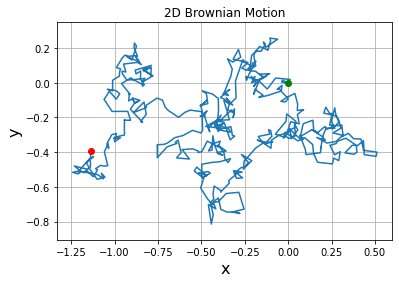

In [9]:
# 2D brownian motion

# The Wiener process parameter
delta = 0.25
# Total time
T = 10
# Number of steps
N = 500
# Time step size
dt = T/N
#Initial values of x
x = np.empty((2, N+1))
x[:,0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:, 1:])

# Plot the 2D trajectory
plt.plot(x[0], x[1])

# Mark start and end points
plt.plot(x[0,0], x[1,0], 'go') #green point
plt.plot(x[0, -1], x[-1,-1], 'ro') #red point

# Plot decorations
plt.title('2D Brownian Motion')
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.axis('equal')
plt.grid(True)
plt.show()